In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.3)

In [40]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# plt.rcParams['font.size'] = 20

# Choose time interval

In [41]:
df = pd.read_csv('csv/cls_results_temp.csv')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Model_name,Batch_size,Resolution,Dropout,lr,acc,In size,Training Epoch,Engine,angular_pixel_size_input_image,More,No. training,No. testing
date,,,,,,,,,,,,,
2024-02-17 19:15:33,EfficientNet-B1,128,240,0.5,0.0001,0.999075,NaN,20,PyTorch,0.00200,NaN,NaN,NaN
2024-02-17 19:36:18,EfficientNet-B1,128,240,0.5,0.0001,0.996670,NaN,20,PyTorch,0.00095,NaN,NaN,NaN
2024-02-17 19:42:42,EfficientNet-B1,128,240,0.5,0.0001,0.999075,NaN,20,PyTorch,0.00140,NaN,NaN,NaN
2024-02-17 20:01:58,EfficientNet-B1,128,240,0.5,0.0001,0.973363,NaN,20,PyTorch,0.00105,NaN,NaN,NaN
2024-02-17 20:08:25,EfficientNet-B1,128,240,0.5,0.0001,0.991676,NaN,20,PyTorch,0.00180,NaN,NaN,NaN


# temp

In [42]:
df_temp = df[['angular_pixel_size_input_image', 'acc']].copy()
df_temp

,angular_pixel_size_input_image,acc
date,,
2024-02-17 19:15:33,0.00200,0.999075
2024-02-17 19:36:18,0.00095,0.996670
2024-02-17 19:42:42,0.00140,0.999075
2024-02-17 20:01:58,0.00105,0.973363
2024-02-17 20:08:25,0.00180,0.991676
...,...,...
2024-02-19 10:27:36,0.00004,0.754996
2024-02-19 12:53:43,0.00003,0.456144
2024-02-19 13:51:26,0.00004,0.767024


In [43]:
df_best = df_temp.groupby('angular_pixel_size_input_image').max()
df_best.head()

,acc
angular_pixel_size_input_image,
0.00001,0.411732
0.00002,0.402850
0.00003,0.456144
0.00004,0.767024
0.00005,0.880459


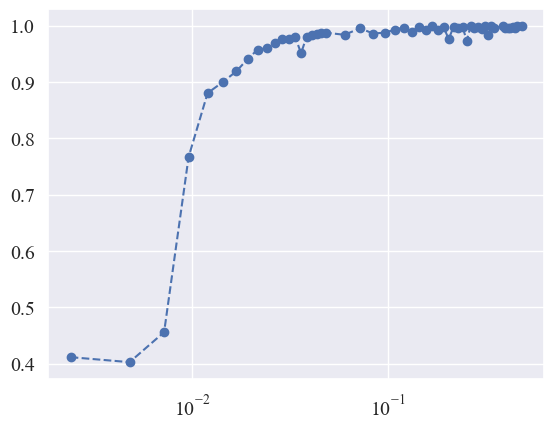

In [44]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.acc
plt.plot(x, y, 'o--')
plt.xscale('log')
plt.show()

In [45]:
def error_bar(x):
    if x > 0.95:
        return np.random.uniform(0, (1-x) / 2)
    elif x > 0.85:
        return np.random.uniform((1-x) / 5, (1-x) / 2)
    elif x > 0.45:
        return np.random.uniform(0.05, 0.1)
    else:
        return np.random.uniform((1-x) / 30, (1-x) / 20)
       

C:\Users\FYQ\AppData\Local\Temp\ipykernel_15008\384289605.py:58: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


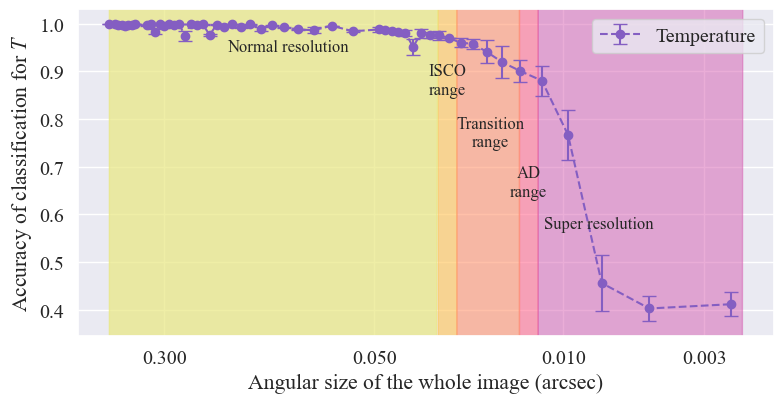

In [46]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
import matplotlib


np.random.seed(2024)
plt.rcParams['font.size'] = 12
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4.2), constrained_layout=True)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='Temperature')
# ax.grid()

el = Ellipse((2, -1), 0.5, 0.5)
num_points = 1000
xf = np.linspace(upper, lower, num_points)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*num_points
yf0 = [y_lower-0.1]*num_points
# BH size range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.6) # 
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.65)
# transition range
xf = np.linspace(lower, ISCO_upper, num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.6)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)
# super resolution
xf = np.linspace(x.min()*0.9, upper, num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.9), interpolate=True, color='#D65DB1', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2-0.15, y_upper-0.08),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, y_upper-0.15),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition\nrange', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2 - 1e-3, y_upper-0.26),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2, y_upper - 0.40),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2, y_upper-0.45),
            horizontalalignment='center', verticalalignment='center')
ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel('Accuracy of classification for $T$') 
ax.set_xscale('log')
ax.set_xticks([0.3, 0.05, 0.01, 0.003])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend()
fig.tight_layout()
plt.savefig('images/temp_vs_angular_size.png', dpi=200)
plt.savefig('images/temp_vs_angular_size.pdf')
plt.show()